# Career Change Prediction

To predict whether individuals are more likely or not to change their occupation based on their academic background, job experience, and other demographic factors.



Load data.

In [2]:
data_path = '/content/drive/MyDrive/IT7133/Project/career_change_prediction_dataset.csv'

In [3]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

#load data with pandas
import pandas as pd
data = pd.read_csv(data_path)

#train test split
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size = 0.2)

Mounted at /content/drive


In [4]:
train_data

,Field of Study,Current Occupation,Age,Gender,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,...,Skills Gap,Family Influence,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
24831,Economics,Artist,35,Female,9,High School,Medium,3,6,49,...,3,NaN,1,0,0,0,8,0,7,1
6981,Arts,Lawyer,26,Female,38,PhD,Low,4,2,57,...,5,NaN,0,0,0,0,2,2,2,1
34022,Biology,Doctor,27,Female,19,PhD,Medium,10,7,98,...,5,High,1,0,0,1,8,2,8,0
32519,Mechanical Engineering,Software Developer,49,Female,0,High School,High,7,6,7,...,10,NaN,0,1,0,0,5,1,4,0
909,Economics,Lawyer,23,Male,36,Master's,High,5,4,44,...,7,Medium,0,0,1,0,1,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24734,Law,Economist,32,Male,2,High School,Medium,5,3,11,...,9,NaN,0,0,1,1,5,2,3,0
9624,Computer Science,Mechanical Engineer,48,Female,7,Bachelor's,High,3,10,58,...,6,NaN,1,0,0,1,9,1,8,1
30011,Education,Psychologist,53,Male,2,High School,High,1,10,2,...,2,Medium,0,1,0,0,1,1,9,1
18522,Mechanical Engineering,Software Developer,28,Male,6,PhD,Low,4,9,24,...,6,High,1,0,0,1,5,0,6,1


### Data Visualization


In [5]:
num_cols = [
    "Age",
    "Years of Experience",
    "Job Opportunities",
    "Salary",
    "Career Change Events"
]

cat_cols = [
    "Field of Study",
    "Current Occupation",
    "Gender",
    "Education Level",
    "Industry Growth Rate",
    "Job Satisfaction",
    "Work-Life Balance",
    "Job Security",
    "Career Change Interest",
    "Skills Gap",
    "Family Influence",
    "Mentorship Available",
    "Certifications",
    "Freelancing Experience",
    "Geographic Mobility",
    "Professional Networks",
    "Technology Adoption",
    "Likely to Change Occupation"
]


### Histograms for Numeric Columns

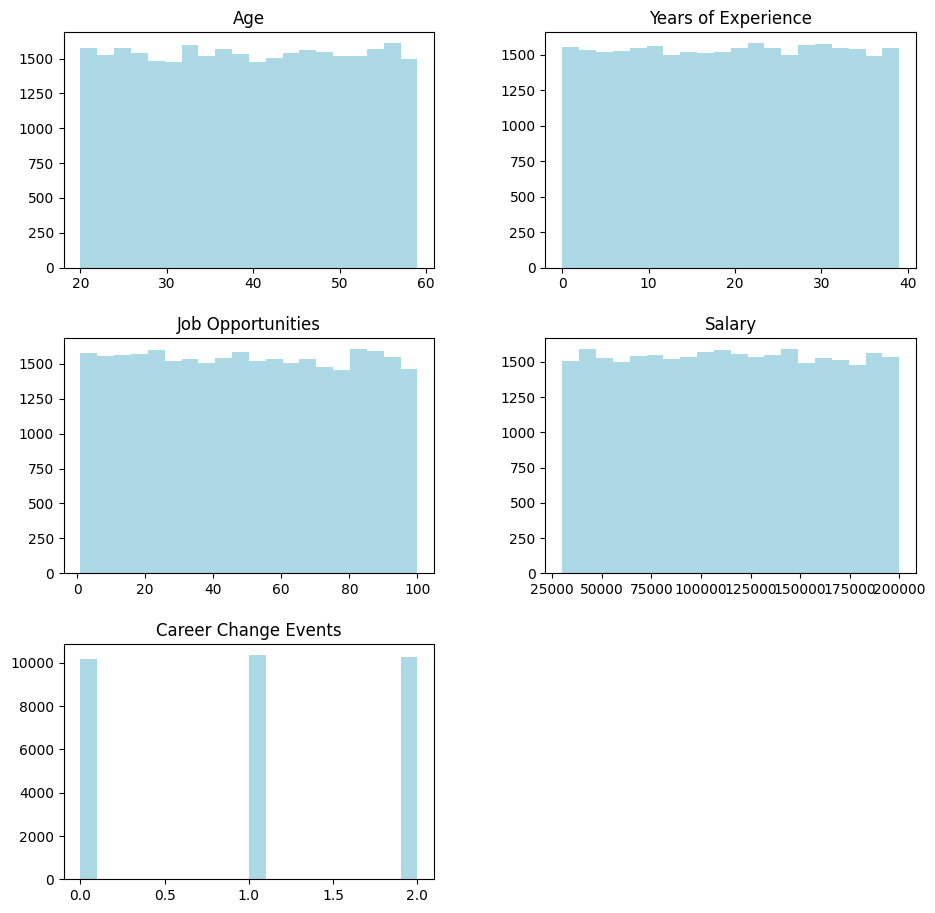

In [6]:
import matplotlib.pyplot as plt
train_data[num_cols].hist(bins=20, figsize=(11,11), color='lightblue', grid=False)
plt.show()

### Bar charts for Categorical Columns

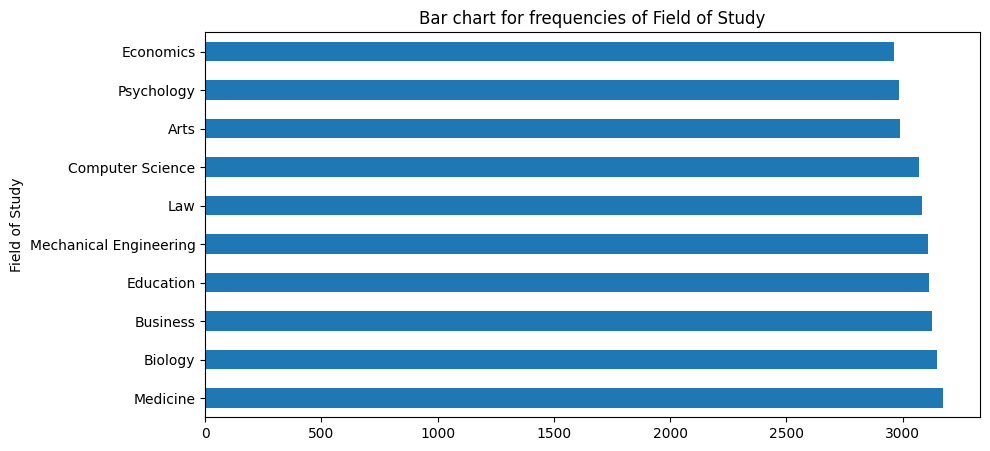

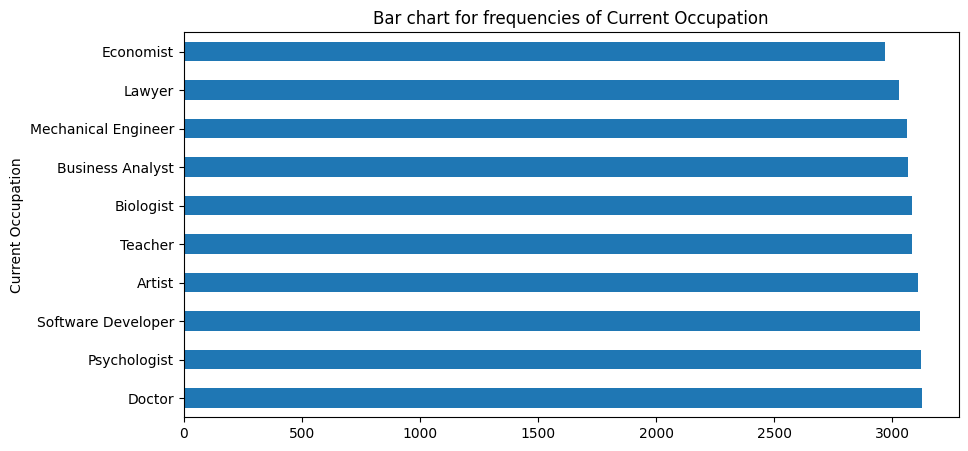

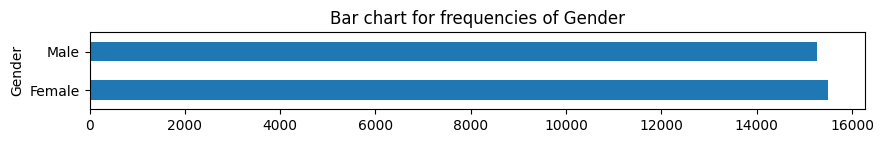

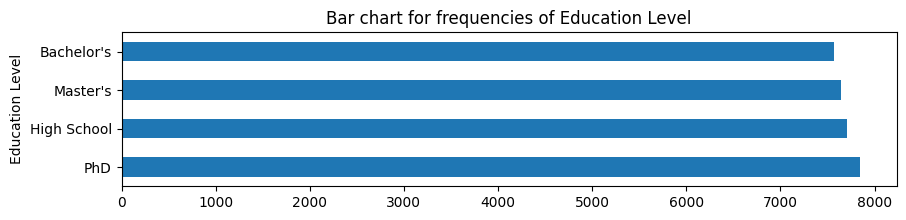

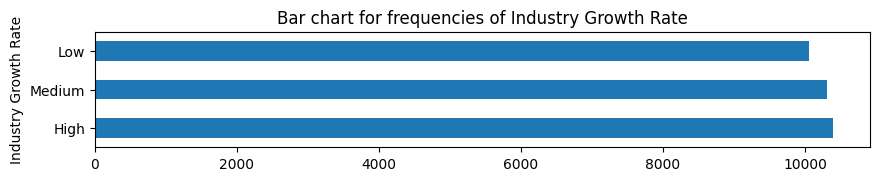

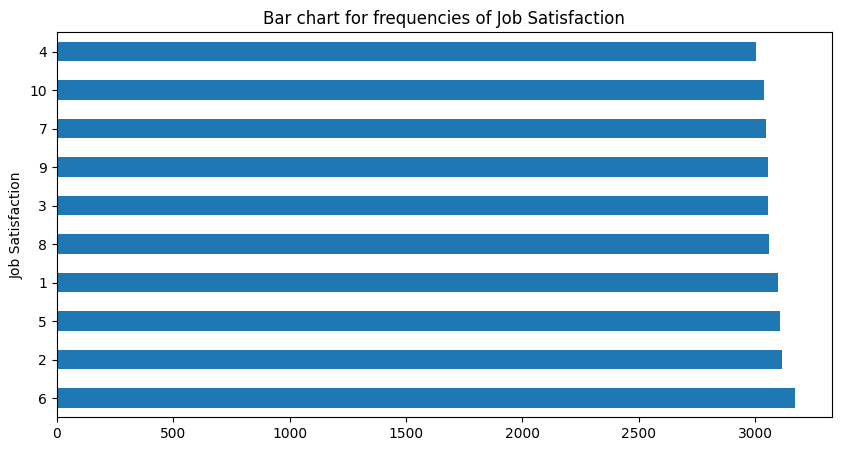

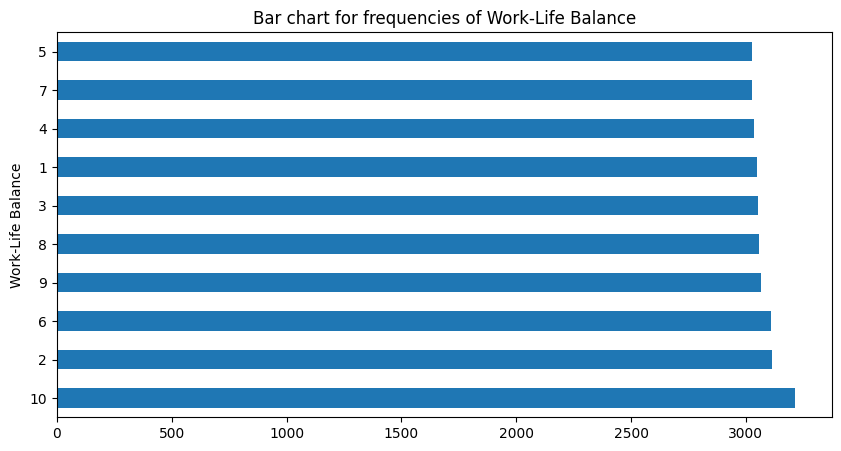

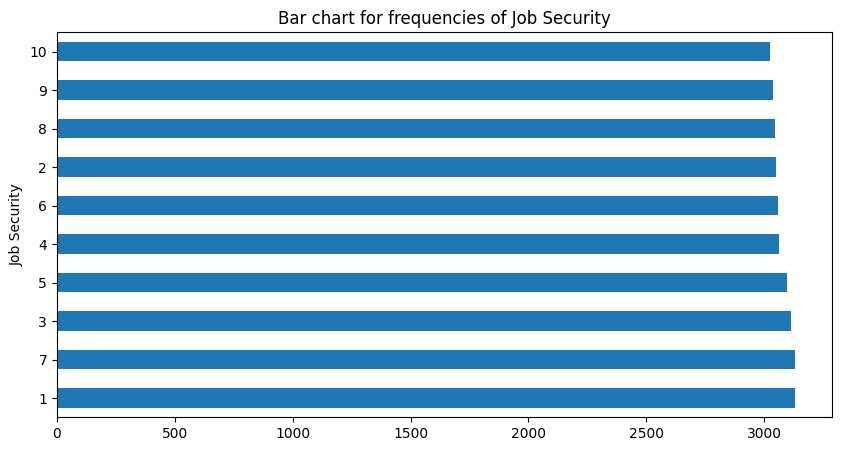

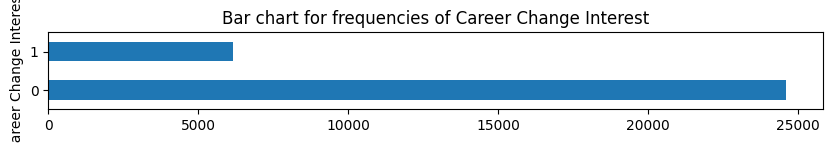

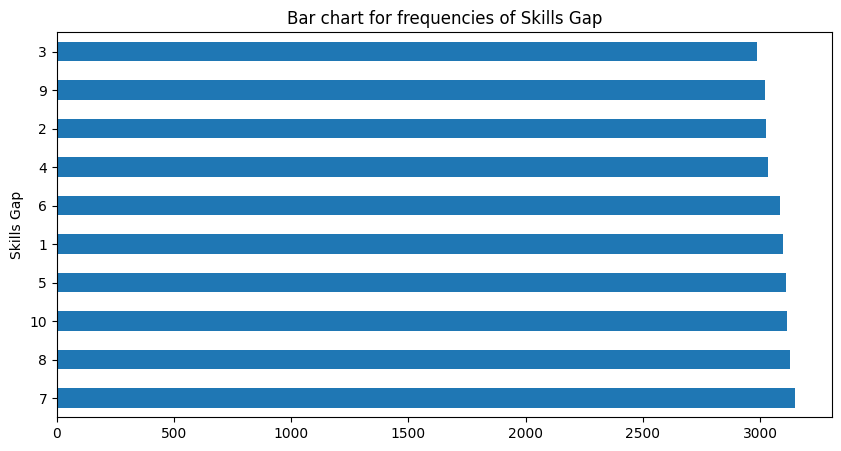

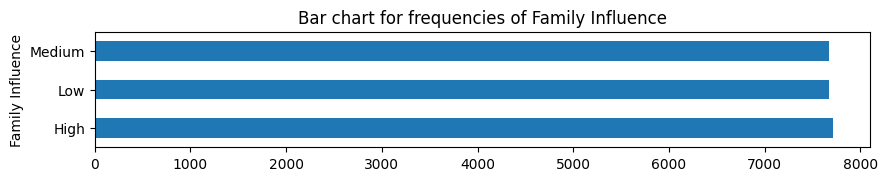

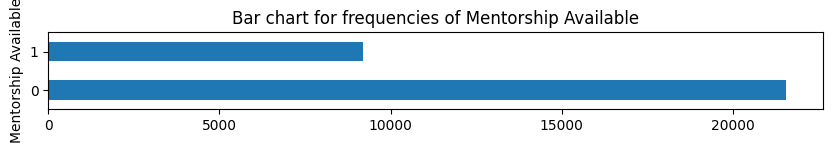

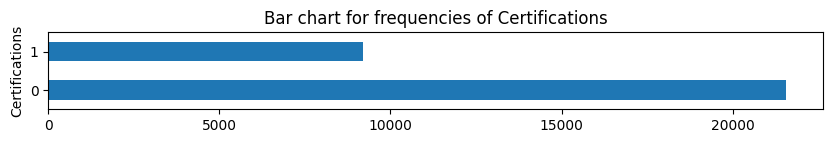

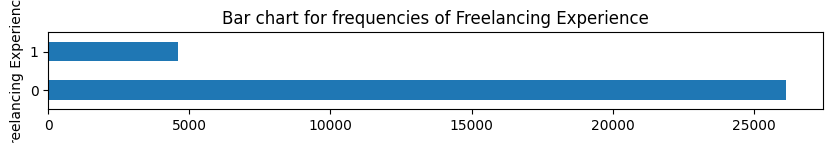

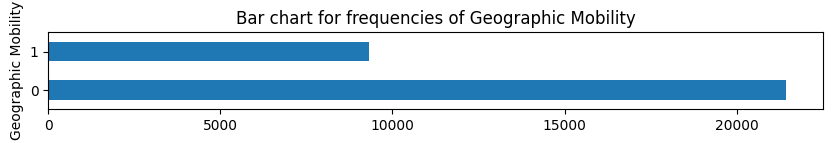

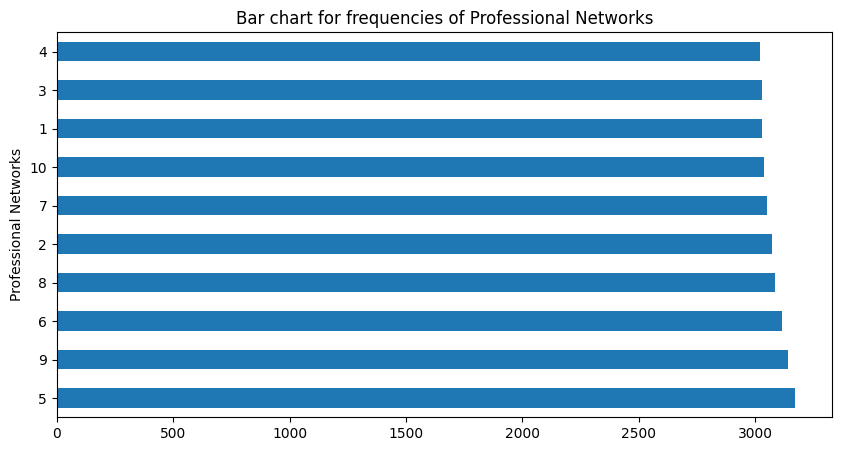

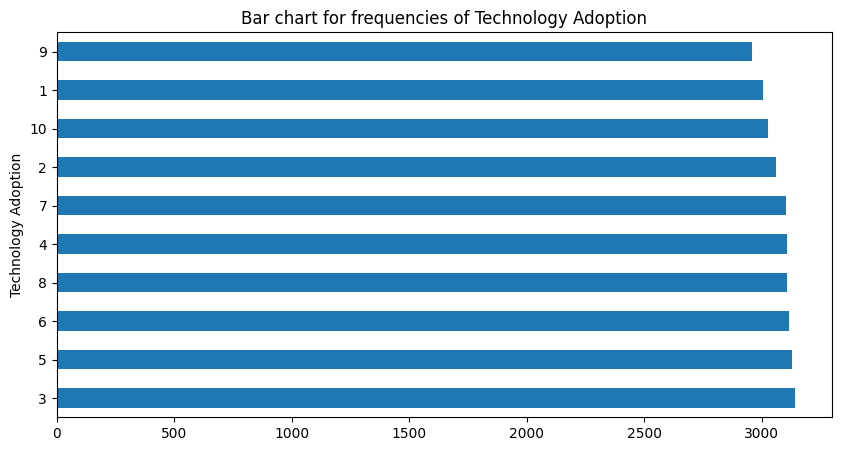

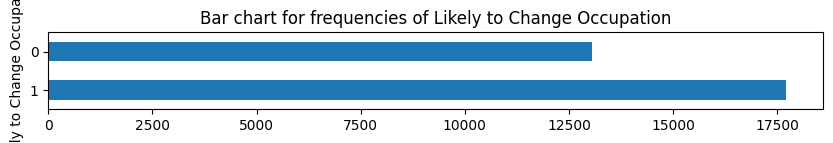

In [7]:
for col in cat_cols:
    freq_table = train_data[col].value_counts()
    plt.figure(figsize = (10,len(freq_table)*0.5)) #a bit formatting so that chart look better
    freq_table.plot.barh(title='Bar chart for frequencies of ' + col)
    plt.show()
    print()

##Key Correlations

The box plot below shows that individuals with higher median salaries are less likely to change their jobs compared to those who have lower median salaries.

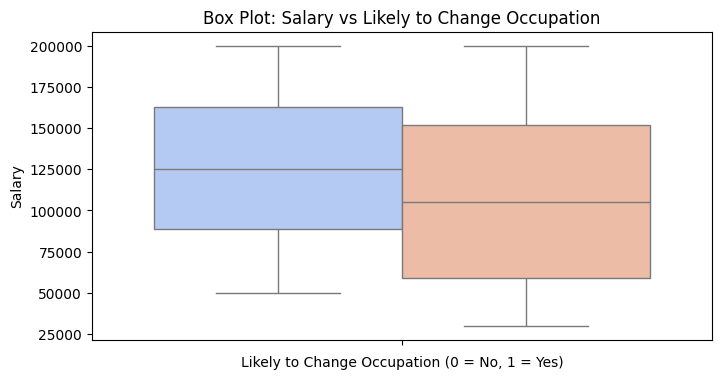

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot to visualize Salary vs Likely to Change Occupation
plt.figure(figsize=(8, 4))
sns.boxplot(hue="Likely to Change Occupation", y="Salary", data=train_data, palette="coolwarm", legend=False)
plt.title("Box Plot: Salary vs Likely to Change Occupation")
plt.xlabel("Likely to Change Occupation (0 = No, 1 = Yes)")
plt.ylabel("Salary")
plt.show()

The heatmap below shows that the lower the job satisfaction, the more likely the individual is to change occupation.

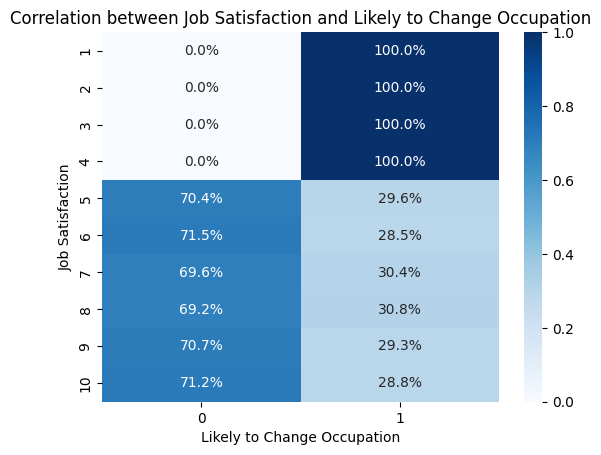

In [17]:
import seaborn as sns

# Create a cross-tabulation
ct = pd.crosstab(data['Job Satisfaction'], data['Likely to Change Occupation'], normalize='index')  # Normalize to show percentages

# Plot the heatmap
sns.heatmap(ct, annot=True, cmap='Blues', fmt='.1%')  # Percentage format
plt.title('Correlation between Job Satisfaction and Likely to Change Occupation')
plt.xlabel('Likely to Change Occupation')
plt.ylabel('Job Satisfaction')
plt.show()


The heatmap below shows that job security has a smaller and more uniform impact on decisions to change occupations, with no strong correlation.

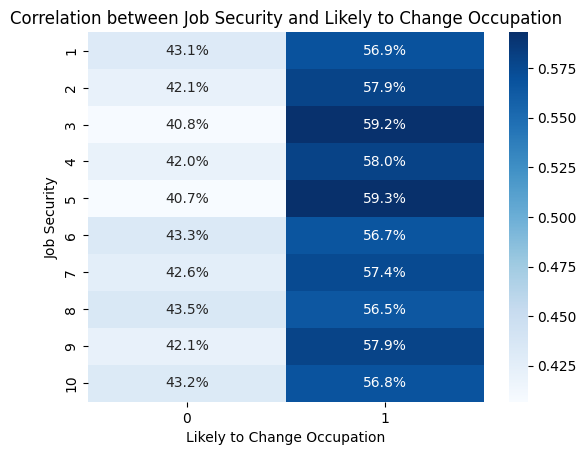

In [18]:
# Create a cross-tabulation
ct = pd.crosstab(data['Job Security'], data['Likely to Change Occupation'], normalize='index')  # Normalize to show percentages

# Plot the heatmap
sns.heatmap(ct, annot=True, cmap='Blues', fmt='.1%')  # Percentage format
plt.title('Correlation between Job Security and Likely to Change Occupation')
plt.xlabel('Likely to Change Occupation')
plt.ylabel('Job Security')
plt.show()


The heatmap below shows that industry growth rate also has a smaller and more uniform impact on decisions to change occupations, with no strong correlation.

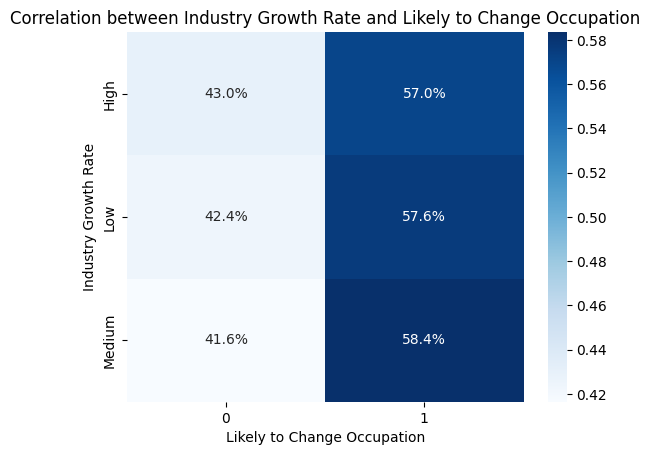

In [19]:
# Create a cross-tabulation
ct = pd.crosstab(data['Industry Growth Rate'], data['Likely to Change Occupation'], normalize='index')  # Normalize to show percentages

# Plot the heatmap
sns.heatmap(ct, annot=True, cmap='Blues', fmt='.1%')  # Percentage format
plt.title('Correlation between Industry Growth Rate and Likely to Change Occupation')
plt.xlabel('Likely to Change Occupation')
plt.ylabel('Industry Growth Rate')
plt.show()


### Data Pipeline


In [20]:
num_cols = [
    "Age",
    "Years of Experience",
    "Job Opportunities",
    "Salary",
    "Career Change Events"
]

cat_cols = [
    "Field of Study",
    "Current Occupation",
    "Gender",
    "Education Level",
    "Industry Growth Rate",
    "Job Satisfaction",
    "Work-Life Balance",
    "Job Security",
    "Career Change Interest",
    "Skills Gap",
    "Family Influence",
    "Mentorship Available",
    "Certifications",
    "Freelancing Experience",
    "Geographic Mobility",
    "Professional Networks",
    "Technology Adoption"
]

all_cols = num_cols + cat_cols

target = 'Likely to Change Occupation'

In [21]:
#processing pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

num_pipeline = Pipeline([                           #now we need a small pipeline for numeric columns since it has two steps
    ('impute', SimpleImputer(strategy='median')),   #this step will impute missing values using column medians
    ('standardize', StandardScaler())               #this step will scale all numeric columns
])

processing_pipeline = ColumnTransformer([                                                      #this transformer merges the processed numeric columns and class columns
    ('numeric', num_pipeline, num_cols),                                                       #numeric columns
    ('class', OneHotEncoder(max_categories=8, handle_unknown='infrequent_if_exist'), cat_cols) #encoder to transform class columns to numeric, this will automatically handle missing data
  ])

Save the processing pipeline

In [22]:
pipeline_save_path = '/content/drive/MyDrive/IT7103/Project/CareerChangePipeline.pk'

In [23]:
import joblib

joblib.dump(processing_pipeline, pipeline_save_path)

['/content/drive/MyDrive/IT7103/Project/CareerChangePipeline.pk']

##Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('logistic', LogisticRegression(max_iter=2000, solver='saga'))
])

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'logistic__penalty' : ['l2', 'l1'],
     'logistic__C': [0.01, 0.1, 1, 10]},
    {'logistic__penalty' : ['elasticnet'],
     'logistic__C': [0.01, 0.1, 1],
     'logistic__l1_ratio' : [0.25, 0.5, 0.75]}
]

grid_search_LR = GridSearchCV(logistic_pipeline, param_grid, cv=5, scoring='f1', return_train_score=True)

grid_search_LR.fit(train_data, train_data [target])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardize',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Years '
                                                                          'of '
                                                                          'Experience',
                                                                          'Job '
                                                                          'Opportunities',
                                                                          'Salary',
                                                                          'Career '
                                                                          'Change '
                                                                          'Events']),
                                                                        ('class',
                                                                         OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                       max_ca...
                                                                          'Geographic '
                                                                          'Mobility',
                                                                          'Professional '
                                                                          'Networks',
                                                                          'Technology '
                                                                          'Adoption'])])),
                                       ('logistic',
                                        LogisticRegression(max_iter=2000,
                                                           solver='saga'))]),
             param_grid=[{'logistic__C': [0.01, 0.1, 1, 10],
                          'logistic__penalty': ['l2', 'l1']},
                         {'logistic__C': [0.01, 0.1, 1],
                          'logistic__l1_ratio': [0.25, 0.5, 0.75],
                          'logistic__penalty': ['elasticnet']}],
             return_train_score=True, scoring='f1')

In [25]:
grid_search_LR.best_estimator_

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['Age', 'Years of Experience',
                                                   'Job Opportunities',
                                                   'Salary',
                                                   'Career Change Events']),
                                                 ('class',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=8),
                                                  ['Field of Study',
                                                   'Current Oc...
                                                   'Gender', 'Education Level',
                                                   'Industry Growth Rate',
                                                   'Job Satisfaction',
                                                   'Work-Life Balance',
                                                   'Job Security',
                                                   'Career Change Interest',
                                                   'Skills Gap',
                                                   'Family Influence',
                                                   'Mentorship Available',
                                                   'Certifications',
                                                   'Freelancing Experience',
                                                   'Geographic Mobility',
                                                   'Professional Networks',
                                                   'Technology Adoption'])])),
                ('logistic',
                 LogisticRegression(C=0.01, max_iter=2000, penalty='l1',
                                    solver='saga'))])

In [26]:
grid_search_LR.best_score_

0.8858874816177448

In [27]:
lr_f1 = grid_search_LR.score(test_data, test_data[target])
print(lr_f1)

0.8828679602460956


##K Nearest Neighbors

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('knn', KNeighborsClassifier())
])

param_grid = [{
  'knn__weights' : ['uniform', 'distance'],
  'knn__n_neighbors' : [3, 5, 7, 10, 20]
}]


grid_search_KNN = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='f1', return_train_score=True)

grid_search_KNN.fit(train_data, train_data[target])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardize',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Years '
                                                                          'of '
                                                                          'Experience',
                                                                          'Job '
                                                                          'Opportunities',
                                                                          'Salary',
                                                                          'Career '
                                                                          'Change '
                                                                          'Events']),
                                                                        ('class',
                                                                         OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                       max_ca...
                                                                          'Change '
                                                                          'Interest',
                                                                          'Skills '
                                                                          'Gap',
                                                                          'Family '
                                                                          'Influence',
                                                                          'Mentorship '
                                                                          'Available',
                                                                          'Certifications',
                                                                          'Freelancing '
                                                                          'Experience',
                                                                          'Geographic '
                                                                          'Mobility',
                                                                          'Professional '
                                                                          'Networks',
                                                                          'Technology '
                                                                          'Adoption'])])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=[{'knn__n_neighbors': [3, 5, 7, 10, 20],
                          'knn__weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='f1')

In [29]:
grid_search_KNN.best_estimator_

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['Age', 'Years of Experience',
                                                   'Job Opportunities',
                                                   'Salary',
                                                   'Career Change Events']),
                                                 ('class',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=8),
                                                  ['Field of Study',
                                                   'Current Oc...,
                                                   'Gender', 'Education Level',
                                                   'Industry Growth Rate',
                                                   'Job Satisfaction',
                                                   'Work-Life Balance',
                                                   'Job Security',
                                                   'Career Change Interest',
                                                   'Skills Gap',
                                                   'Family Influence',
                                                   'Mentorship Available',
                                                   'Certifications',
                                                   'Freelancing Experience',
                                                   'Geographic Mobility',
                                                   'Professional Networks',
                                                   'Technology Adoption'])])),
                ('knn',
                 KNeighborsClassifier(n_neighbors=20, weights='distance'))])

In [30]:
grid_search_KNN.best_score_

0.8382182629257484

In [31]:
knn_f1 = grid_search_KNN.score(test_data, test_data[target])
print(knn_f1)

0.829393268894841


## Support Vector Machine

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

train_data_sample, _ = train_test_split(train_data, train_size=0.2, random_state=42)

svc = Pipeline([
    ('processing', processing_pipeline),
    ('svc', SVC())
])

param_grid = [
    {'svc__kernel':['linear'],
     'svc__C' : [0.001, 0.1, 1, 10]},
    {'svc__kernel':['poly'],
     'svc__degree' : [2, 3],
     'svc__coef0' : [0, 1],
     'svc__C' : [0.1, 1, 10, 100]},
    {'svc__kernel':['rbf'],
     'svc__gamma' : [0.01, 0.1, 1, 10],
     'svc__C' : [0.01, 0.1, 1, 10]}
]

grid_search_SVC = GridSearchCV(svc, param_grid, cv=3, scoring='f1', return_train_score=True)
grid_search_SVC.fit(train_data_sample,train_data_sample[target])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardize',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Years '
                                                                          'of '
                                                                          'Experience',
                                                                          'Job '
                                                                          'Opportunities',
                                                                          'Salary',
                                                                          'Career '
                                                                          'Change '
                                                                          'Events']),
                                                                        ('class',
                                                                         OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                       max_ca...
                                                                          'Geographic '
                                                                          'Mobility',
                                                                          'Professional '
                                                                          'Networks',
                                                                          'Technology '
                                                                          'Adoption'])])),
                                       ('svc', SVC())]),
             param_grid=[{'svc__C': [0.001, 0.1, 1, 10],
                          'svc__kernel': ['linear']},
                         {'svc__C': [0.1, 1, 10, 100], 'svc__coef0': [0, 1],
                          'svc__degree': [2, 3], 'svc__kernel': ['poly']},
                         {'svc__C': [0.01, 0.1, 1, 10],
                          'svc__gamma': [0.01, 0.1, 1, 10],
                          'svc__kernel': ['rbf']}],
             return_train_score=True, scoring='f1')

In [33]:
grid_search_SVC.best_estimator_

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['Age', 'Years of Experience',
                                                   'Job Opportunities',
                                                   'Salary',
                                                   'Career Change Events']),
                                                 ('class',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=8),
                                                  ['Field of Study',
                                                   'Current Occupation',
                                                   'Gender', 'Education Level',
                                                   'Industry Growth Rate',
                                                   'Job Satisfaction',
                                                   'Work-Life Balance',
                                                   'Job Security',
                                                   'Career Change Interest',
                                                   'Skills Gap',
                                                   'Family Influence',
                                                   'Mentorship Available',
                                                   'Certifications',
                                                   'Freelancing Experience',
                                                   'Geographic Mobility',
                                                   'Professional Networks',
                                                   'Technology Adoption'])])),
                ('svc', SVC(C=1, gamma=0.1))])

In [34]:
grid_search_SVC.best_score_

0.9196690310841049

In [35]:
svc_f1 = grid_search_SVC.score(test_data, test_data[target])
print(svc_f1)

0.9241423396548051


## Neural Network (MLP)

In [36]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define the pipeline
mlp_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('mlp', MLPClassifier(max_iter=1000))
])

# Get the number of input features
n_features = processing_pipeline.fit_transform(train_data).shape[1]

# Optimized hyperparameter grid
param_grid = [{
    'mlp__hidden_layer_sizes': [
        [n_features],                  # Single hidden layer with n_features neurons
        [n_features//2],               # Single hidden layer with n_features/2 neurons
        [n_features*2],                # Single hidden layer with n_features*2 neurons
        [n_features, n_features//2],   # Two hidden layers: n_features and n_features/2 neurons
        [n_features//2, n_features//2] # Two hidden layers: n_features/2 neurons in both
    ],
    'mlp__alpha': [0.001, 0.01, 0.1],
}]

# GridSearchCV
grid_search_MLP = GridSearchCV(
    mlp_pipeline, param_grid, cv=3, scoring='f1', return_train_score=True
)

# Fit the model
grid_search_MLP.fit(train_data, train_data[target])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardize',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Years '
                                                                          'of '
                                                                          'Experience',
                                                                          'Job '
                                                                          'Opportunities',
                                                                          'Salary',
                                                                          'Career '
                                                                          'Change '
                                                                          'Events']),
                                                                        ('class',
                                                                         OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                       max_ca...
                                                                          'Gap',
                                                                          'Family '
                                                                          'Influence',
                                                                          'Mentorship '
                                                                          'Available',
                                                                          'Certifications',
                                                                          'Freelancing '
                                                                          'Experience',
                                                                          'Geographic '
                                                                          'Mobility',
                                                                          'Professional '
                                                                          'Networks',
                                                                          'Technology '
                                                                          'Adoption'])])),
                                       ('mlp', MLPClassifier(max_iter=1000))]),
             param_grid=[{'mlp__alpha': [0.001, 0.01, 0.1],
                          'mlp__hidden_layer_sizes': [[92], [46], [184],
                                                      [92, 46], [46, 46]]}],
             return_train_score=True, scoring='f1')

In [37]:
grid_search_MLP.best_estimator_

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['Age', 'Years of Experience',
                                                   'Job Opportunities',
                                                   'Salary',
                                                   'Career Change Events']),
                                                 ('class',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=8),
                                                  ['Field of Study',
                                                   'Current Oc...
                                                   'Gender', 'Education Level',
                                                   'Industry Growth Rate',
                                                   'Job Satisfaction',
                                                   'Work-Life Balance',
                                                   'Job Security',
                                                   'Career Change Interest',
                                                   'Skills Gap',
                                                   'Family Influence',
                                                   'Mentorship Available',
                                                   'Certifications',
                                                   'Freelancing Experience',
                                                   'Geographic Mobility',
                                                   'Professional Networks',
                                                   'Technology Adoption'])])),
                ('mlp',
                 MLPClassifier(alpha=0.1, hidden_layer_sizes=[46],
                               max_iter=1000))])

In [38]:
grid_search_MLP.best_score_

0.9232460509385785

In [39]:
mlp_f1 = grid_search_MLP.score(test_data, test_data[target])
print(mlp_f1)

0.9161704076958315


##TabNet

Install pytorch-tabnet library.

In [40]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

Filter unnecessary columnns.

In [41]:
train_data, val_data = train_test_split(train_data, test_size = 0.2)

train_data_tabnet = train_data[all_cols + [target]]
val_data_tabnet = val_data[all_cols + [target]]
test_data_tabnet = test_data[all_cols + [target]]

Encode categorical data into ID values.

In [42]:
from sklearn.preprocessing import LabelEncoder

cat_dims =  {}

for col in cat_cols:
    print(col, train_data[col].nunique())
    label_encoder = LabelEncoder()
    train_data_tabnet[col] = label_encoder.fit_transform(train_data[col].values)
    val_data_tabnet[col] = label_encoder.transform(val_data[col].values)
    test_data_tabnet[col] = label_encoder.transform(test_data[col].values)
    cat_dims[col] = len(label_encoder.classes_)

Field of Study 10
Current Occupation 10
Gender 2
Education Level 4
Industry Growth Rate 3
Job Satisfaction 10
Work-Life Balance 10
Job Security 10
Career Change Interest 2
Skills Gap 10
Family Influence 3
Mentorship Available 2
Certifications 2
Freelancing Experience 2
Geographic Mobility 2
Professional Networks 10
Technology Adoption 10


Identify the indices and dimensions of the categorical columns in the dataset.


In [43]:
cat_idxs = [i for i, f in enumerate(all_cols) if f in cat_cols]
cat_dims = [cat_dims[f] for i, f in enumerate(all_cols) if f in cat_cols]

Build TabNet model

In [ ]:
n_decisions = 64
n_attentions = 64
n_steps = 5
learning_rate = 0.01

from pytorch_tabnet.tab_model import TabNetClassifier
import torch

tabnet = TabNetClassifier(
    n_d=n_decisions,
    n_a=n_attentions,
    n_steps=n_steps,
    cat_dims=cat_dims,
    cat_emb_dim=cat_dims,
    cat_idxs=cat_idxs,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=learning_rate)
)

Train TabNet model

In [45]:
n_epochs = 500
batch_size = 1024
patience = 20

X_train = train_data_tabnet[all_cols].values
y_train = train_data_tabnet[target].values
X_val = val_data_tabnet[all_cols].values
y_val = val_data_tabnet[target].values

tabnet.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_name=['train', 'valid'],
    max_epochs=n_epochs,
    patience=patience,
    batch_size=batch_size
)

epoch 0  | loss: 0.71804 | train_auc: 0.70409 | valid_auc: 0.70297 |  0:00:04s
epoch 1  | loss: 0.36881 | train_auc: 0.88694 | valid_auc: 0.89429 |  0:00:07s
epoch 2  | loss: 0.26197 | train_auc: 0.92997 | valid_auc: 0.93102 |  0:00:09s
epoch 3  | loss: 0.19873 | train_auc: 0.97076 | valid_auc: 0.9715  |  0:00:11s
epoch 4  | loss: 0.14895 | train_auc: 0.98096 | valid_auc: 0.98285 |  0:00:14s
epoch 5  | loss: 0.09463 | train_auc: 0.98966 | valid_auc: 0.99    |  0:00:18s
epoch 6  | loss: 0.05371 | train_auc: 0.99346 | valid_auc: 0.99388 |  0:00:20s
epoch 7  | loss: 0.04181 | train_auc: 0.99883 | valid_auc: 0.99858 |  0:00:23s
epoch 8  | loss: 0.0247  | train_auc: 0.99911 | valid_auc: 0.99916 |  0:00:25s
epoch 9  | loss: 0.022   | train_auc: 0.99989 | valid_auc: 0.99992 |  0:00:27s
epoch 10 | loss: 0.01886 | train_auc: 0.99995 | valid_auc: 0.99995 |  0:00:30s
epoch 11 | loss: 0.01739 | train_auc: 0.99993 | valid_auc: 0.99993 |  0:00:33s
epoch 12 | loss: 0.01822 | train_auc: 0.99997 | vali

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Predict probabilities for each class label for test data.

In [46]:
test_probs = tabnet.predict_proba(test_data_tabnet[all_cols].values)
test_probs

array([[6.0738564e-14, 1.0000000e+00],
       [2.2884652e-14, 1.0000000e+00],
       [7.7193663e-06, 9.9999225e-01],
       ...,
       [4.5374868e-18, 1.0000000e+00],
       [9.9999619e-01, 3.8580333e-06],
       [7.1520503e-07, 9.9999928e-01]], dtype=float32)

Get id of the label.

In [47]:
import numpy as np

test_pred_id = np.argmax(test_probs, axis=1)
test_pred_id

array([1, 1, 1, ..., 1, 0, 1])

Use the id2label dictionary to get the true labels.

In [48]:
id2label = {idx : label for idx, label in enumerate(tabnet.classes_)}

test_pred_label = np.array(list(map(lambda x: id2label[x], test_pred_id)))
test_pred_label

array([1, 1, 1, ..., 1, 0, 1])

Evaluation for TabNet Model

In [49]:
from sklearn.metrics import f1_score

tabnet_f1 = f1_score(test_data_tabnet[target], test_pred_label, average='weighted')
print(f"Test F1 Score: {tabnet_f1}")


Test F1 Score: 0.9959708301740345


##Models' Performances Comparison

Logistic Regression: F1 Score = 0.8829
K-Nearest Neighbors: F1 Score = 0.8294
Support Vector Classifier: F1 Score = 0.9241
Multi-layer Perceptron: F1 Score = 0.9162
TabNet: F1 Score = 0.9960


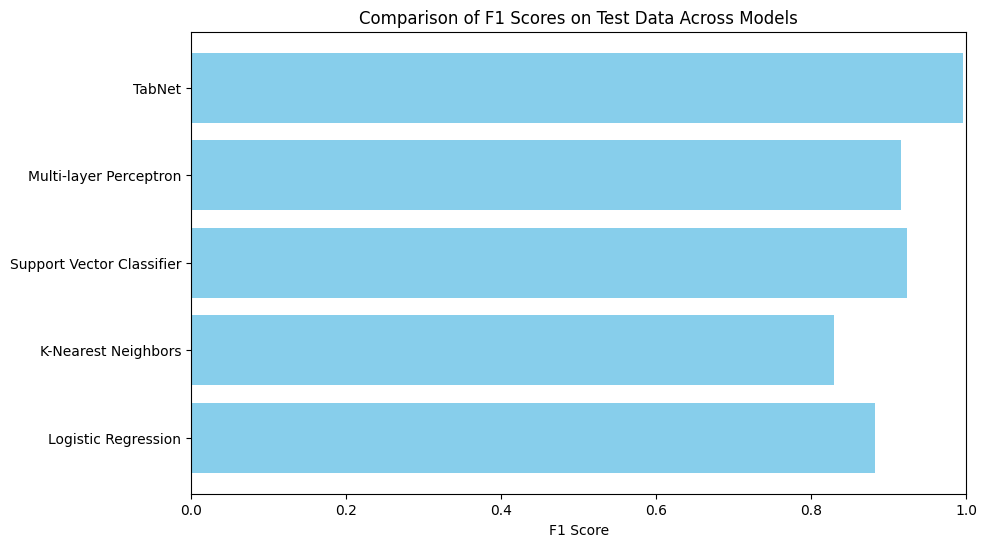

In [50]:
# Create a summary table to compare the F1 scores
model_comparison = {
    'Logistic Regression': lr_f1,
    'K-Nearest Neighbors': knn_f1,
    'Support Vector Classifier': svc_f1,
    'Multi-layer Perceptron': mlp_f1,
    'TabNet': tabnet_f1
}

# Print the F1 scores for all models
for model, score in model_comparison.items():
    print(f'{model}: F1 Score = {score:.4f}')

# Create a bar chart to compare the F1 scores
models = list(model_comparison.keys())
f1_scores = list(model_comparison.values())

plt.figure(figsize=(10, 6))
plt.barh(models, f1_scores, color='skyblue')
plt.xlabel('F1 Score')
plt.title('Comparison of F1 Scores on Test Data Across Models')
plt.xlim(0, 1)  # Set the x-axis limit to [0, 1] for F1 scores
plt.show()
